# Figure 5

Examples of measure values for different rollout types. The left column shows rollouts of the attendance as depicted in Figure \ref{fig:patterns}. The center column presents histograms of the observed states for each corresponding rollout. The right column displays the values of each of the five measures for the respective rollout.

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Classes.bar import Bar
from Utils.plot_utils import PlotsAndMeasures
from Utils.utils import GetMeasurements
from Utils.interaction import Performer
from Utils.indices import AlternationIndex


In [ ]:
def plot_measures(list_of_alternations, list_of_titles, num_rounds):
	fig, axes = plt.subplots(
        len(list_of_alternations), 3,
		figsize=(9, 3*len(list_of_alternations)),
		tight_layout=True
	)
	for i, alternations in enumerate(list_of_alternations):
		# Detect number of agents
		num_agents = len(alternations[0])
		# Create bar object
		bar = Bar(
			num_agents=num_agents,
			threshold=0.7
		)
		list_decisions = alternations * (num_rounds // len(alternations)) + alternations[:num_rounds % len(alternations)]
		for decisions in list_decisions:
			bar.step(decisions)
		bar.render(
			ax=axes[i, 0],
			file=None,
			num_rounds=len(bar.history)
		)
		if list_of_titles is not None:
			axes[i, 0].set_title(list_of_titles[i])
		axes[i, 0].axis('off')

		data = bar.to_pandas()
		data['model']=1
		p = PlotsAndMeasures(data)
		p.plot_hist_states(
			T=np.inf, 
			ax=axes[i, 1]
		)

	# fig.savefig('Figure5.png', dpi=300)
	fig.show()

ValueError: No objects to concatenate

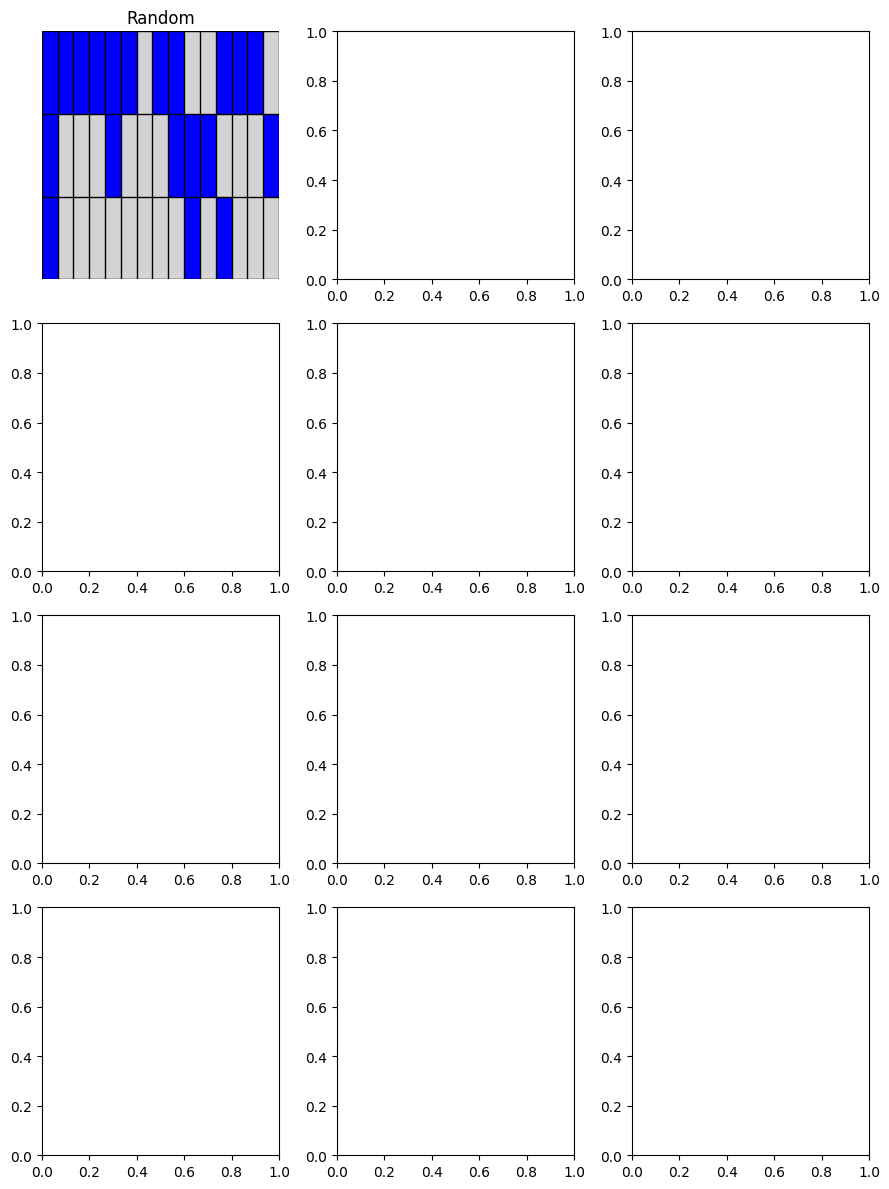

In [9]:
num_rounds = 15
list_of_alternations = [
	[np.random.randint(0, 2, 3).tolist() for _ in range(num_rounds)],
	[[1, 1, 0]],
	[[1, 1, 0], [1, 0, 1], [0, 1, 1]],
	[[1, 1, 0], [1, 0, 1]],
]
plot_measures(
    list_of_alternations=list_of_alternations, 
    list_of_titles = ['Random', 'Segmentation', 'Alternation', 'Mixed'],
    num_rounds=num_rounds
)